In [1]:
import pandas as pd
from os.path import join
import numpy as np
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt

In [2]:
dataroot  = '/data/juma/data/ddos/CSVs_r_1.0/SR_10/FFS_(8,16,4)/PCAP-03-11'
filename = 'MemoryUsage_FI_60_Flow.csv'

In [3]:
df = pd.read_csv(join(dataroot,filename))
df = df.sample(frac=1)
df = df.sort_values('Timestamp')
df.columns

Index(['Timestamp', '#concurrentFlows', '#WSAF'], dtype='object')

In [4]:
time_labels = np.linspace(df['Timestamp'].min(),df['Timestamp'].max(),6)

In [5]:
def convert_to_datetime(arr):
    fmt = '%H:%M'
    offset = timedelta(hours=11,minutes=36)
    arr_str = []
    for t in arr:
        dt = datetime.fromtimestamp(t/1000000.)
        dt = dt-offset
        arr_str.append(dt.strftime(fmt))
    return arr_str

In [6]:
lindices = convert_to_datetime(time_labels)

In [7]:
lindices

['09:42', '11:21', '13:01', '14:41', '16:21', '18:00']

/data/juma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


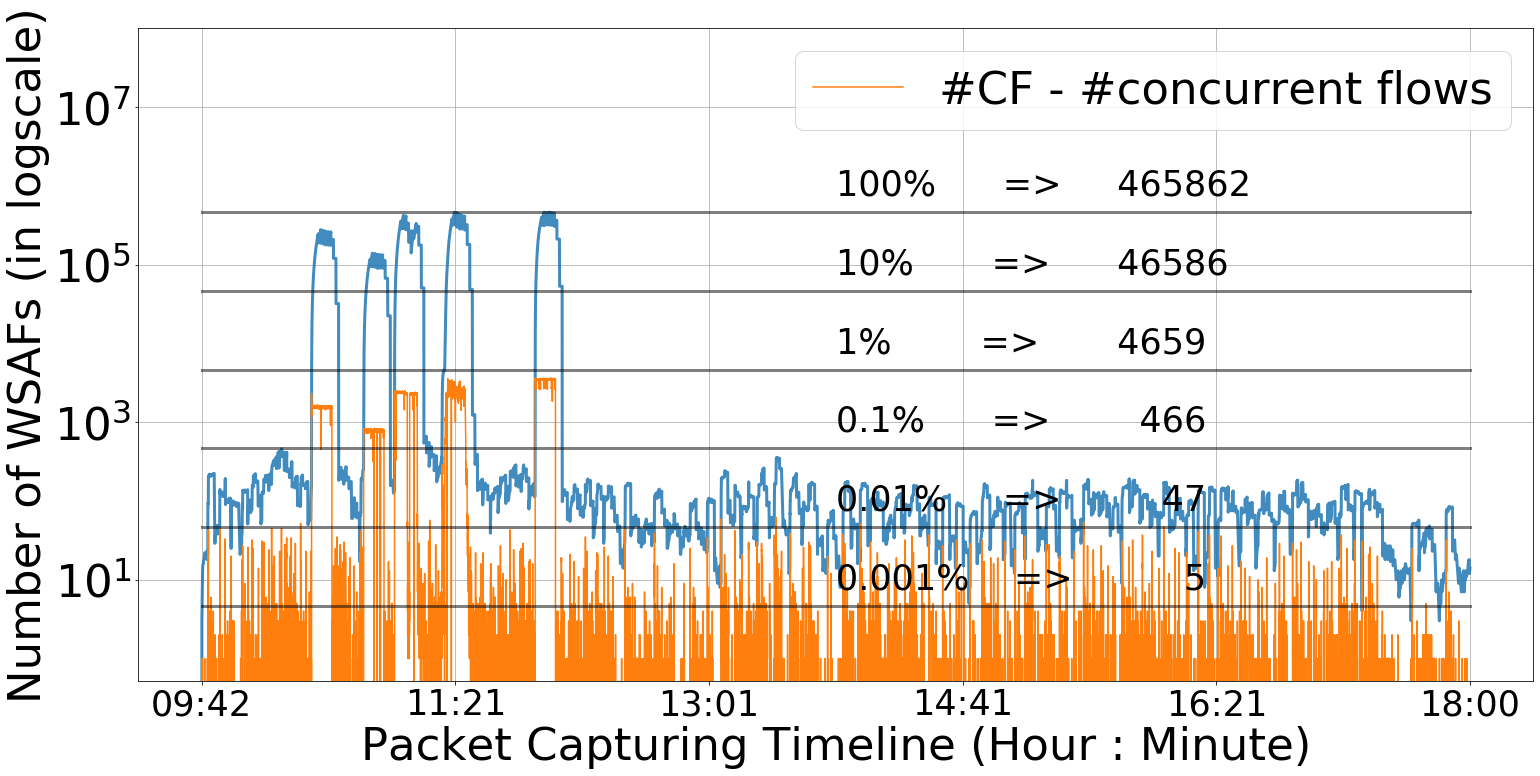

In [8]:
plt.rcParams["figure.figsize"] = (25,12)
plt.rcParams.update({'font.size': 45})

plt.plot(df['Timestamp'],df['#WSAF'],linewidth=3,alpha=.85)
plt.plot(df['Timestamp'],df['#concurrentFlows'],label='#CF - #concurrent flows')
plt.xticks(time_labels,lindices,fontsize=35)
plt.yscale('log')
plt.grid()
plt.ylim(0,10**8)
plt.legend()

plt.ylabel('Number of WSAFs (in logscale)')
plt.xlabel('Packet Capturing Timeline (Hour : Minute)')

start = df['Timestamp'].min()
end = df['Timestamp'].max()

max_wsaf_count = df['#WSAF'].max()
percentage = 100
percent_labels = ['100%','10%','1%','0.1%','0.01%','0.001%']
for i in range(6):
    threshold = max_wsaf_count/10**i
    plt.text((start+end)*1./2,threshold+300000/10**i,'{0:8}  => {1:10.0f}'.format(percent_labels[i].ljust(8),threshold),fontsize=35)
    plt.plot([start,end],[threshold,threshold],color='black',alpha=.5,linewidth=3)
plt.savefig(join(dataroot,'wsafCount.png'))
plt.show()

/data/juma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


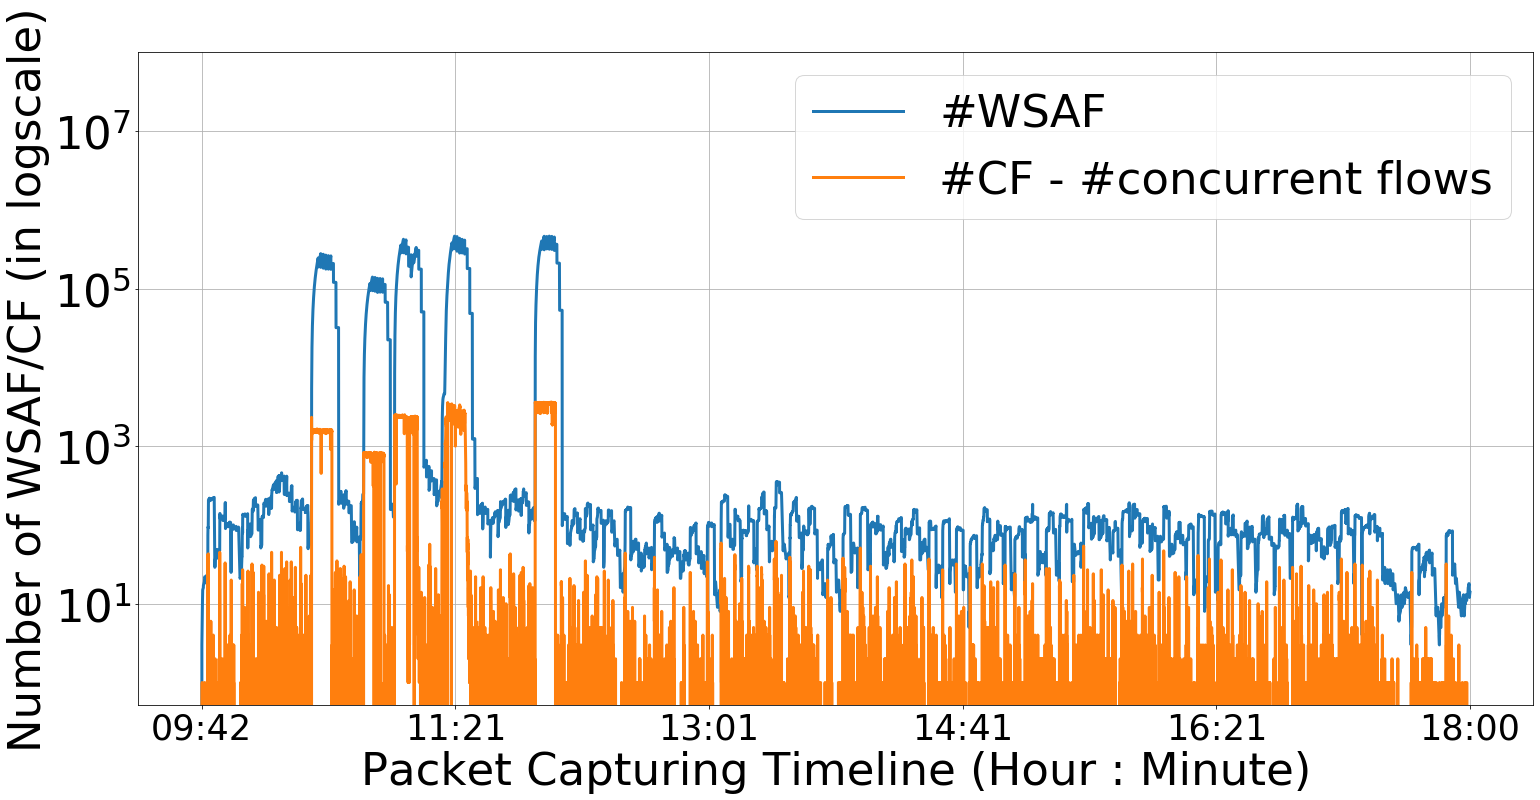

In [9]:
plt.rcParams["figure.figsize"] = (25,12)
plt.rcParams.update({'font.size': 45})

plt.plot(df['Timestamp'],df['#WSAF'],linewidth=3, label='#WSAF')
plt.plot(df['Timestamp'],df['#concurrentFlows'],linewidth=3,label='#CF - #concurrent flows')
plt.xticks(time_labels,lindices,fontsize=35)
plt.yscale('log')
plt.grid()
plt.ylim(0,10**8)
plt.legend()

plt.ylabel('Number of WSAF/CF (in logscale)')
plt.xlabel('Packet Capturing Timeline (Hour : Minute)')

plt.savefig(join(dataroot,'wsafNCFCount.png'))
plt.show()